In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import CHILDES_DFS, DATA_DIR
from childes_mi.utils.general import flatten

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
transcript_df = pd.read_pickle(CHILDES_DFS/'childes_df.pickle')
#transcript_df['dataset'] = [i[0].split('/')[11] for i in transcript_df.transcript_xml.values]
len(transcript_df)

123175

In [5]:
# mask for only a subset of corpuses
possible_corpuses = [
    # carterette is also transcribed in IPA
    "Carterette",  # 1st, 3rd, 5th grade, adults, speech naturalistic speech in IPA https://childes.talkbank.org/access/Eng-NA/Carterette.html
    "Gillam",  # normal subset, spontaneous storytelling 5-11y11m https://childes.talkbank.org/access/Clinical-MOR/Gillam.html
    "Braunwald",  # single subject from 1-6yo talking to family https://childes.talkbank.org/access/Eng-NA/Braunwald.html
    "Brown",  # 1y6m-5y1m, 3 subjects naturalistic talking to parents https://childes.talkbank.org/access/Eng-NA/Brown.html
    "EllisWeismer",  # 2y6m - 5y6 naturalistic play-oriented talk with instructor # https://childes.talkbank.org/access/Clinical-MOR/EllisWeismer.html
    "Gleason",  # 2;1 - 5;2 family interactions https://childes.talkbank.org/access/Eng-NA/Gleason.html
    # "NewmanRatner", very mother-driven convo, probably shouldnt use https://childes.talkbank.org/access/Eng-NA/NewmanRatner.html
    "NH",# Nicholas-NH,  # 1;0-4;0, videotaped play with parent https://childes.talkbank.org/access/Clinical-MOR/Nicholas/NH.html
    "Post",  # 1;7-2;8 60m session with family and toys https://childes.talkbank.org/access/Eng-NA/Post.html
    "Normal",  #  Rondal-Normal 3-12yo free play with mother and child https://childes.talkbank.org/access/Clinical-MOR/Normal /Normal.html
]
corpus_mask = [corpus in possible_corpuses for corpus in transcript_df.corpus.values]
transcript_df = transcript_df[corpus_mask]

In [6]:
# mask for a subset of roles
possible_roles = ['Target_Child', 'Child']
role_mask = [role in possible_roles for role in transcript_df.role.values]
transcript_df = transcript_df[role_mask]
len(transcript_df)

2785

In [7]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,2102,2102,2102
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,2729,2729,2729
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,2019,2019,2019


In [8]:
print(transcript_df.corpus.unique())

['Carterette' 'Brown' 'Braunwald' 'Post' 'Gleason' 'Normal' 'Gillam'
 'EllisWeismer' 'NH']


In [9]:
print("there are {} words in this dataset".format(np.sum(transcript_df.n_words.values)))

there are 341548 words in this dataset


### Get child ages

In [10]:
import re
def convert_age(age_year):
    "Caclculate age in months from a string in CHILDES format"
    if age_year[-1] == 'Y':
        age_year += '0'
    m = re.match("P(\d+)Y(\d+)M?(\d?\d?)D?", age_year)
    age_month = int(m.group(1)) * 12 + int(m.group(2))
    try:
        if int(m.group(3)) > 15:
            age_month += 1
    # some corpora don't have age information?
    except ValueError as e:
        pass
    return age_month

In [11]:
transcript_df["age_months"] = [
    convert_age(i) if type(i) == str else np.nan for i in tqdm(transcript_df.age.values)
]

In [12]:
transcript_df["age_years"] = transcript_df["age_months"] / 12

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


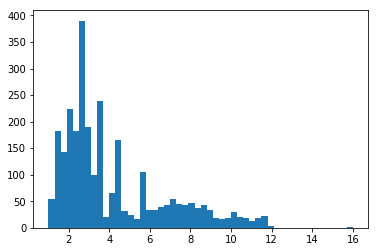

In [24]:
plt.hist(transcript_df.age_years.values, bins = 50);

In [14]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS,age_months,age_years
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,2102,2102,2102,72.0,6.0
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,2729,2729,2729,120.0,10.0
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,2019,2019,2019,96.0,8.0


/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 6)

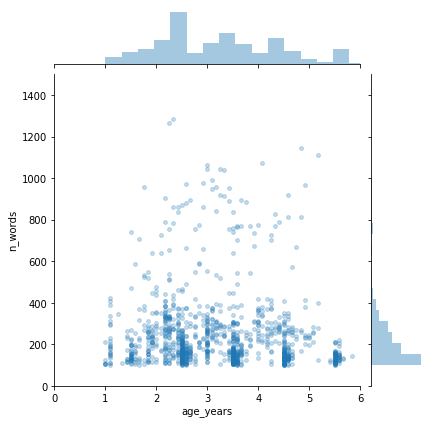

In [15]:
import seaborn as sns
grd = sns.jointplot("age_years", "n_words", data=transcript_df[transcvscode-remote://ssh-remote%2B7b22686f73744e616d65223a2274786f72692e756373642e656475222c2275736572223a22747361696e627572227d/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/figures/epic_kitchens_mi.jpgript_df.n_words > 100], alpha=0.25, s= 15)
ax = grd.ax_joint
ax.set_ylim([0,1500])
ax.set_xlim([0, 6])

In [31]:
np.mean(transcript_df.n_words)

122.63842010771992

## MI
- for each sequence, calculate the decay of a sequence as a function of distance between elements for that sequence indiividually
- Treat each phoneme as unique for that child, and compute MI across children

In [16]:
from childes_mi.information_theory import mutual_information as mi

#### Test run

In [17]:
distances = np.arange(1,101)

In [18]:
longest_row = transcript_df.sort_values(by='n_words', ascending=False).iloc[0]
words_list = ''.join(flatten([i for i in flatten(longest_row.words) if i is not None]))
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information([list(words_list)], distances = distances)
print(words_list[:10], len(np.unique(list(words_list))))

wellumIhav 52


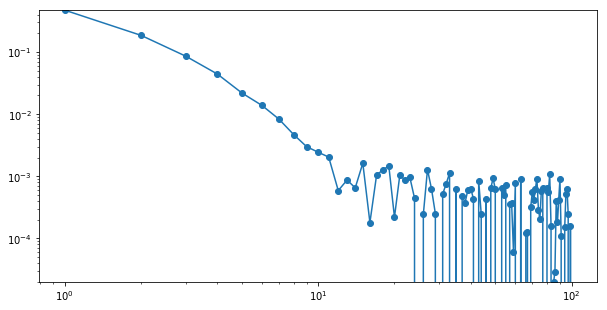

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(distances, MI-shuff_MI)
ax.plot(distances, MI-shuff_MI)
axmin = np.min((MI-shuff_MI)[(MI-shuff_MI) > 0])
axmax = np.max((MI-shuff_MI)[(MI-shuff_MI) > 0])
ax.set_ylim([axmin, axmax])
ax.set_yscale('log')
ax.set_xscale('log')

#### Run MI by age cohort

In [20]:
age_cohorts = [[0.5, 1], [1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 20]]

In [21]:
mi_df = pd.DataFrame(
    columns=[
        "MI",
        "MI_var",
        "shuff_MI",
        "shuff_MI_var",
        "distances",
        "age_cohort_low",
        "age_cohort_high",
        "n_words",
        "n_unique_words",
    ]
)
# for each age cohort
for (age_cohort_low, age_cohort_high) in tqdm(age_cohorts):
    cohort_subset = transcript_df[
        (transcript_df.age_months/12 > age_cohort_low) & (transcript_df.age_months/12 <= age_cohort_high)
    ]

    cohort_words = [
        [
            row.PID + "_" + i
            for i in "".join(flatten([i for i in flatten(row.words) if i is not None]))
        ]
        for idx, row in cohort_subset.iterrows()
    ]
    
    n_words = len(np.concatenate(cohort_words))
    n_unique_words = len(np.unique(np.concatenate(cohort_words)))

    (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
        cohort_words, distances=distances, n_jobs=-1
    )

    mi_df.loc[len(mi_df)] = [
        MI,
        MI_var,
        shuff_MI,
        shuff_MI_var,
        distances,
        age_cohort_low,
        age_cohort_high,
        n_words,
        n_unique_words,
    ]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:   11.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:   13.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:   10.3s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:   10.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:   38.3s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:   40.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   42.1s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:   30.8s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:   30.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.9s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:  1.2min remaining:   25.6s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:  1.3min remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:  1.2min remaining:   25.3s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:  1.2min remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:   53.6s remaining:   18.8s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:   57.5s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   59.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:   39.8s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:   39.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.4s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:  5.3min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:  5.4min remaining:   17.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.7min finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:  5.7min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:  6.2min remaining:   19.6s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.2min finished


In [25]:
mi_df[:3]

,MI,MI_var,shuff_MI,shuff_MI_var,distances,age_cohort_low,age_cohort_high,n_words,n_unique_words
0,"[6.0615547382637684, 5.953026573946322, 5.8999...","[0.06497202939114834, 0.06421181443545038, 0.0...","[5.79799893493386, 5.805771966570329, 5.792474...","[0.06474471004074468, 0.06537742978608413, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.5,1,2371,72
1,"[10.373016081368098, 10.130972857078175, 9.987...","[0.00937963690006051, 0.009307961610168364, 0....","[9.60947032947951, 9.60572819037825, 9.5994570...","[0.009097935454051041, 0.009124346562127784, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1.0,1.5,67747,3609
2,"[11.349881924265677, 11.087999639009142, 10.96...","[0.005174827403727939, 0.005136394630766223, 0...","[10.681207621740015, 10.677630292519837, 10.67...","[0.005060342080401666, 0.005066649080465537, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1.5,2,232191,8134


In [26]:
mi_df.to_pickle(DATA_DIR / "mi" / "childes_mi.pickle")

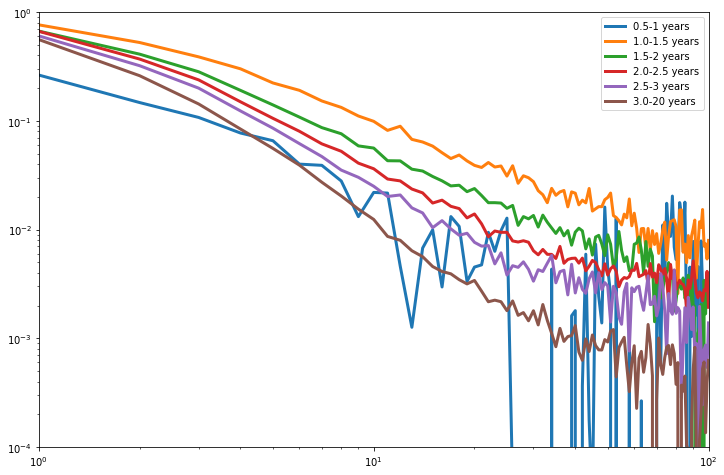

In [27]:
fig, ax = plt.subplots(figsize=(12,8))

for idx, row in mi_df.iterrows():
    MI = row.MI-row.shuff_MI
    MI_var = row.MI_var
    #ax.scatter(distances, row.MI-row.shuff_MI)
    ax.plot(distances, row.MI-row.shuff_MI, label = '{}-{} years'.format(row.age_cohort_low, row.age_cohort_high), lw=3)
    #ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.05)
ax.legend()
ax.set_ylim([1e-4,1])
ax.set_xlim([1, 100])

ax.set_yscale('log')
ax.set_xscale('log')


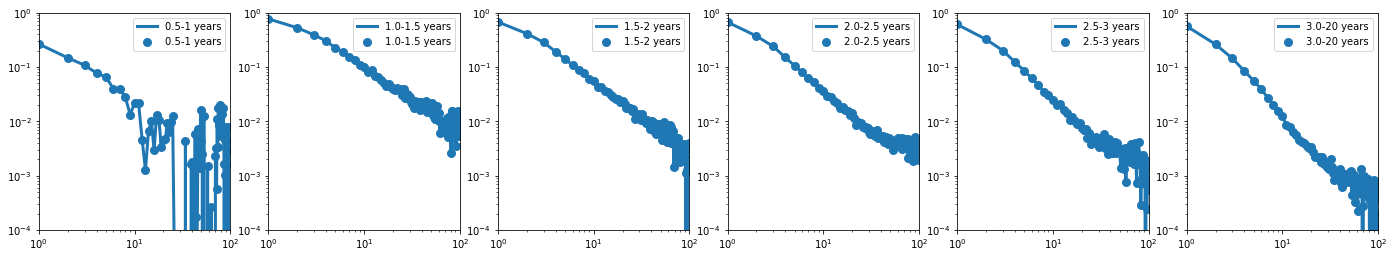

In [28]:
fig, axs = plt.subplots(ncols=len(mi_df), figsize=(4*len(mi_df),4))

for axi, (idx, row) in enumerate(mi_df.iterrows()):
    MI = row.MI-row.shuff_MI
    MI_var = row.MI_var
    #ax.scatter(distances, row.MI-row.shuff_MI)
    ax = axs[axi]
    ax.plot(distances, row.MI-row.shuff_MI, label = '{}-{} years'.format(row.age_cohort_low, row.age_cohort_high), lw=3)
    ax.scatter(distances, row.MI-row.shuff_MI, label = '{}-{} years'.format(row.age_cohort_low, row.age_cohort_high), lw=3)
    #ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.05)
    ax.legend()
    ax.set_ylim([1e-4,1])
    ax.set_xlim([1, 100])

    ax.set_yscale('log')
    ax.set_xscale('log')


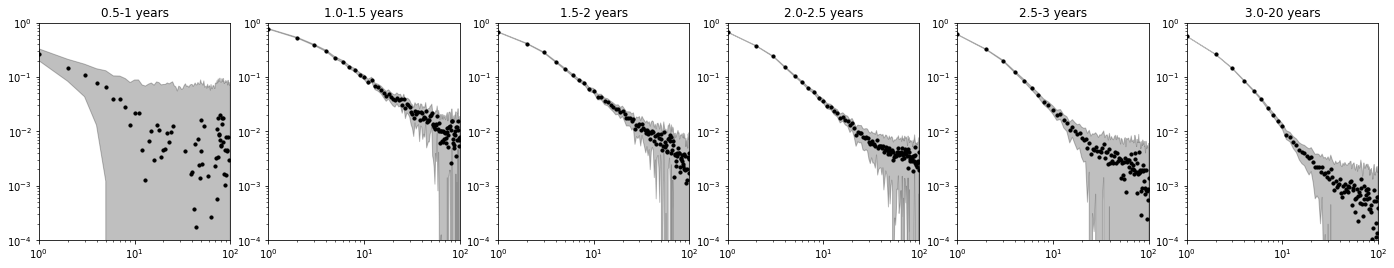

In [29]:
fig, axs = plt.subplots(ncols=len(mi_df), figsize=(4*len(mi_df),4))

for axi, (idx, row) in enumerate(mi_df.iterrows()):
    MI = row.MI-row.shuff_MI
    MI_var = row.MI_var
    #ax.scatter(distances, row.MI-row.shuff_MI)
    ax = axs[axi]
    #ax.plot(distances, row.MI-row.shuff_MI, label = '{}-{} years'.format(row.age_cohort_low, row.age_cohort_high), lw=3)
    ax.scatter(distances, row.MI-row.shuff_MI, s=10, color='k')
    ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
    #ax.legend()
    ax.set_title('{}-{} years'.format(row.age_cohort_low, row.age_cohort_high))
    ax.set_ylim([1e-4,1])
    ax.set_xlim([1, 100])

    ax.set_yscale('log')
    ax.set_xscale('log')
